In [1]:
import numpy as np
import matplotlib.pyplot as plt


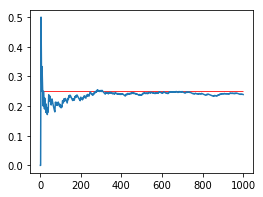

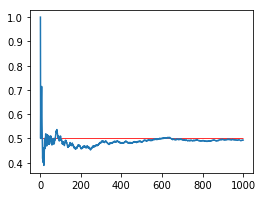

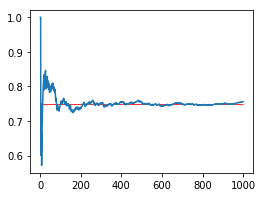

In [18]:
from scipy.stats import bernoulli


p_params = (0.25, 0.5, 0.75)
for p in p_params:
    fig = plt.gcf()
    fig.set_size_inches(4, 3)
    amt = 1000
    rvs = bernoulli(p).rvs(size=amt)
    # s_n/n

    c_sum = rvs.cumsum()
    n = np.array(range(1, amt + 1))

    plt.plot(n, c_sum/n)
    plt.hlines(p, 0, 1000, 'r', linewidth=0.8)
    plt.show()


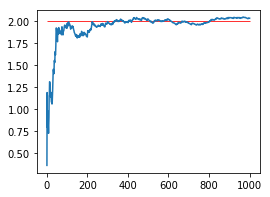

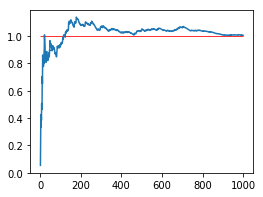

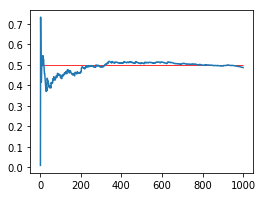

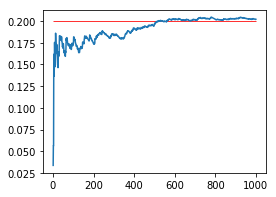

In [19]:
from scipy.stats import expon

p_params = (0.5, 1, 2, 5)
for p in p_params:
    fig = plt.gcf()
    fig.set_size_inches(4, 3)
    amt = 1000
    rvs = expon(loc=0, scale=(1/p)).rvs(size=amt)
    # s_n/n

    c_sum = rvs.cumsum()
    n = np.array(range(1, amt + 1))

    plt.plot(n, c_sum/n)
    plt.hlines(1/p, 0, 1000, 'r', linewidth=0.8)
    plt.show()

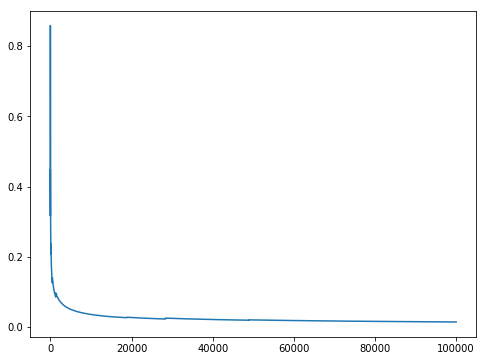

In [25]:
from scipy.stats import norm

fig = plt.gcf()
fig.set_size_inches(8, 6)
amt = 100_000
xi_rvs = norm(loc=0, scale=1).rvs(amt)

mins = np.maximum.accumulate(abs(xi_rvs))
n = np.array(range(1, amt + 1))

plt.plot(n, mins/(n)**0.5)

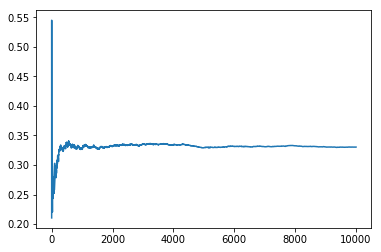

In [36]:
from scipy.stats import uniform


def monte_carlo(n):
    
    @np.vectorize
    def f(x): return x**2
        
#     n = 10_000
    xi = uniform(0, 1).rvs(size=n)
    data = f(xi).cumsum()/np.arange(1, n + 1)
    return data
    
# print(monte_carlo(0, 0))

data = monte_carlo(10000)
plt.plot(data)


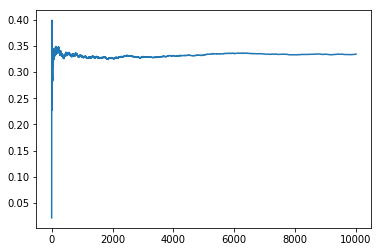

In [39]:
from scipy.stats import expon


def monte_carlo2(n):
    
    @np.vectorize
    def f(x): return 1/x**2
        
#     n = 10_000
    xi = expon(loc=1).rvs(size=n)
    x = f(xi).cumsum()
    data = (x/(expon.pdf(xi, loc=1)))/np.arange(1, n + 1)
    return data
    
# print(monte_carlo(0, 0))

data = monte_carlo(10000)
plt.plot(data)